In [1]:
# Initialization of quantumState
import pennylane as qml
from pennylane import numpy as np

device = qml.device("default.qubit", wires = 3)

@qml.qnode(device)
def circuit(state = None):
    qml.StatePrep(state, wires = range(1), normalize= True)
    qml.BasisState(np.array(3), wires = range(2))
    return qml.state()


initial_state = np.array([0.5, 0.5])
state = circuit(initial_state)

In [2]:
# Codercise 2.1
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def prep_circuit(alpha, beta, gamma):
    """
    Prepares the state alpha|001> + beta|010> + gamma|100>.
    Args:
    alpha, beta, gamma (np.complex): The coefficients of the quantum state
    to prepare.
    Returns:
    (np.array): The quantum state
    """
    initial_state = np.zeros(8)
    initial_state[int(0b001)] = alpha
    initial_state[int(0b010)] = beta
    initial_state[int(0b100)] = gamma
    qml.StatePrep(initial_state, wires = range(3))
    
    return qml.state()

alpha, beta, gamma = 1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3),

print("The prepared state is", prep_circuit(alpha, beta, gamma))

The prepared state is [0.        +0.j 0.57735027+0.j 0.57735027+0.j 0.        +0.j
 0.57735027+0.j 0.        +0.j 0.        +0.j 0.        +0.j]


In [3]:
# Codercise 2.2
import pennylane as qml
from pennylane import numpy as np
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def single_qubit_gates(theta, phi):
    """
    Implements the quantum circuit shown in the statement
    Args:
    - theta, phi (float): The arguments for the RX and RZ gates, respectively
    Returns:
    - (np.array): The output quantum state.
    
    """

    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.T(wires = 0)
    qml.S(wires = 1)
    qml.RX(theta, wires = 0)
    qml.RZ(phi, wires = 1)
    
    return qml.state()

theta, phi = np.pi/3, np.pi/4
print("The output state of the circuit is: ", single_qubit_gates(theta, phi))

The output state of the circuit is:  [ 0.49572243-0.39667667j -0.07003593+0.63102146j  0.30438071-0.0652631j
 -0.16908169+0.26137765j]


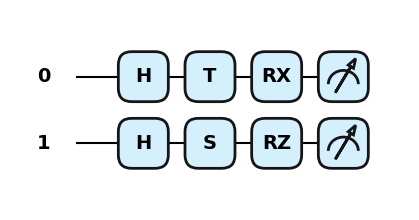

In [4]:
import matplotlib.pyplot as plt

fig, ax = qml.draw_mpl(single_qubit_gates, style = "pennylane")(theta, phi)
fig.set_size_inches(4,2)
plt.show()